## Linear Regression Analysis
### Simplilearn Video

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # we imported matplotlib, which seaborn uses. Seaborn recognizes the Pandas dataframe
%matplotlib inline # our inline coding, without this our visualization wouldn't display
# You could display it to a file and other means

In [5]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values # use iloc [take every row, except for the last column]
y = companies.iloc[:, 4].values # use iloc [set to last row]

companies.head() # list the first 5 rows of data
# remember when we're programming, we always start with zero

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

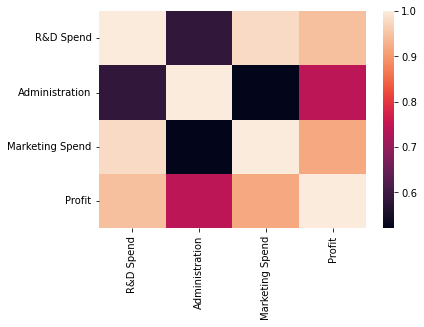

In [6]:
# Data Visualization
# Building the Correlation matrix
sns.heatmap(companies.corr()) # corr() stands for coordinates
# if you cross index any two of these, the light (in this plot) diagonal row that shows that this is the highest corresponding data
# the darker (in this plot) is where there's less connections between the data

In [7]:
# Encoding categorical data
# At timestamp 25:13 in the Simplilearn video, the code used to One Hot Encode categorical data is deprecated -
# instead, use the following code to turn your categorical data into numerical numbers (Step: 471)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3]) # change categorical data into numerical data
onehotencoder = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder="passthrough")
X = onehotencoder.fit_transform(X)

In [8]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:] # removing that one extra column we put in there whe we did our OneHotEncoder and our label encoding

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # test size = 0.2 or 20%

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.2814305 ,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645085,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475223,
        68896.39346904, 210040.00765884, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.08266881,
        93745.66352058,  

In [14]:
# Calculating the Coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [15]:
# Calcultaing the Intercept
print(regressor.intercept_)

-51035.2297240395


In [16]:
# Calculating the R squared value, we're looking at the error
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
# R squared value of 0.91 proves the model is a good model, 0.9 or higher is a good model

0.9112695892268868